### 👥 Integrantes: 

- [Alan Gonçalves](https://github.com/alansgoncalves)
- [Élen Silva Almeida](https://github.com/Lely0sa)
- [Gabriel Matina](https://github.com/gabrielmatina)
- [Gustavo Dell Anhol Oliveira](https://github.com/gudaoliveira)
- [Patrick Kwan](https://github.com/ptkwan)

Tópicos das aulas

- Estatística descritiva
- Probabilidade e distribuições
- Inferência
- Amostragem
- Testes estatísticos de hipótese

_A proposta do projeto final é desenvolver uma análise exploratória de dados
(EDA) com enfoque na avaliação de relações entre as variáveis medidas e uma variável
dependente, a qual constitui aquilo que geralmente se costuma objetivar prever em uma base de dados._

[Entregar neste link](https://docs.google.com/spreadsheets/d/1qBwKAnW83AZUQlgzldMMi50QqsZBuBC7CI4_P68boVM/edit#gid=0)

- Determinar a taxa geral de rotatividade de funcionários na empresa.
    - Analisar a distribuição da rotatividade por departamento e cargo
    - Comparar a rotatividade entre diferentes grupos demográficos, como gênero, nível de educação, campo de educação, etc.

- Salário e Benefícios:
    - Comparar a renda mensal média entre funcionários que deixaram a empresa e aqueles que permaneceram.
    - Analisar a relação entre a satisfação no trabalho e o salário ou benefícios.

- Experiência Profissional:
    - Avaliar a relação entre o número de anos de experiência total e a probabilidade de rotatividade.
    - Investigar se existe uma diferença na rotatividade entre funcionários que trabalharam em várias empresas anteriormente e aqueles que não o fizeram.

- Satisfação no Trabalho e Envolvimento:
    - Analisar a relação entre o nível de satisfação no trabalho e a probabilidade de rotatividade.

O primeiro passo é instalar as bibliotecas necessárias no projeto.

Para isso abra o terminal (CTRL+J), copie os dados abaixo, cole no terminal e precione enter.

pip install pandas
pip install numpy
pip install scikit-learn
pip install statsmodels
pip install plotly
pip install plotly
pip install folium

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [13]:
df = pd.read_csv('data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
list_of_col = df.columns

for col in list_of_col:
    print(col)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [19]:
# - Analisar a distribuição da rotatividade por departamento
#
# Colunas
#   Attrition
#   Department
#   JobRole


count_dep = df[['Department', 'EmployeeNumber']]
count_dep = count_dep.groupby('Department')['EmployeeNumber'].count().reset_index()
count_dep['ShareEmployees %'] = count_dep['EmployeeNumber'].apply(lambda x: round(x / sum(count_dep['EmployeeNumber']) * 100, 2))
count_dep = count_dep.sort_values('EmployeeNumber', ascending=False)


rotativ_dep = df[['Attrition', 'Department']]
rotativ_dep = rotativ_dep.groupby('Department')['Attrition'].sum().reset_index()
rotativ_dep = rotativ_dep.sort_values('Attrition', ascending=False)

count_dep = pd.merge(count_dep, rotativ_dep, on='Department')
count_dep['ShareAttrition %'] = count_dep.apply(lambda row: round(row['Attrition'] / row['EmployeeNumber'] * 100, 2), axis=1)

count_dep_total = pd.DataFrame([{
    'Department':'Total',
    'EmployeeNumber': count_dep['EmployeeNumber'].sum(),
    'ShareEmployees %': count_dep['ShareEmployees %'].sum(),
    'Attrition':count_dep['Attrition'].sum(),
    'ShareAttrition %':count_dep['ShareAttrition %'].sum()}])
count_dep = pd.concat([count_dep, count_dep_total], ignore_index = True)

df_long = pd.melt(id_vars=count_dep['Department'], value_vars=count_dep[['EmployeeNumber', 'Attrition']])

display(count_dep)
sns.barplot(data=df_long, x='x', y='Valores', hue='Y', palette='muted')


TypeError: melt() missing 1 required positional argument: 'frame'

,JobRole,EmployeeNumber,Share %
0,Sales Executive,232,21.93
1,Research Scientist,214,20.23
2,Laboratory Technician,188,17.77
3,Manufacturing Director,107,10.11
4,Healthcare Representative,88,8.32
5,Manager,79,7.47
6,Research Director,62,5.86
7,Sales Representative,58,5.48
8,Human Resources,30,2.84
9,Total,1058,100.01


,JobRole,Attrition
0,Healthcare Representative,8
1,Human Resources,6
2,Laboratory Technician,49
3,Manager,5
4,Manufacturing Director,7
5,Research Director,2
6,Research Scientist,38
7,Sales Executive,39
8,Sales Representative,25


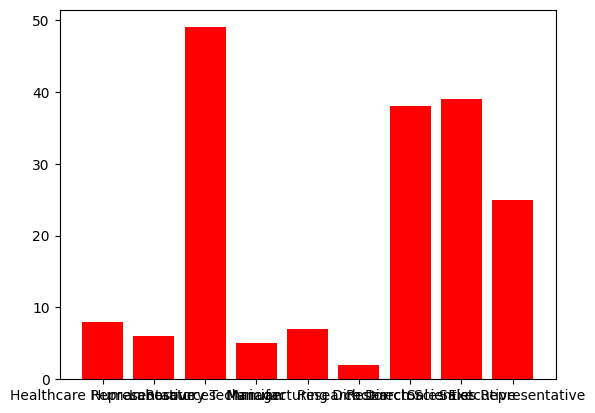

In [20]:
# - Analisar a distribuição da rotatividade por departamento
#
# Colunas
#   Attrition
#   Department
#   JobRole


count_dep = df[['JobRole', 'EmployeeNumber']]
count_dep = count_dep.groupby('JobRole')['EmployeeNumber'].count().reset_index()
count_dep['Share %'] = count_dep['EmployeeNumber'].apply(lambda x: round(x / sum(count_dep['EmployeeNumber']) * 100, 2))
count_dep = count_dep.sort_values('EmployeeNumber', ascending=False)

count_dep_total = pd.DataFrame([{
    'JobRole':'Total',
    'EmployeeNumber': count_dep['EmployeeNumber'].sum(),
    'Share %': count_dep['Share %'].sum()}])
count_dep = pd.concat([count_dep, count_dep_total], ignore_index = True)

rotativ_dep = df[['Attrition', 'JobRole']]
rotativ_dep = rotativ_dep.groupby('JobRole')['Attrition'].sum().reset_index()

display(count_dep)
display(rotativ_dep)
plt.bar(rotativ_dep['JobRole'], rotativ_dep['Attrition'], color='red')
plt.show()

Quantidade de pessoas por setor

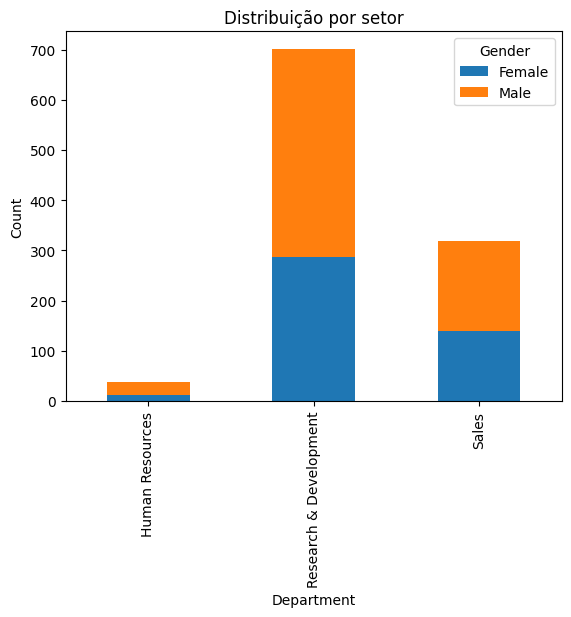

In [43]:
gender_department_counts = df.groupby(['Department', 'Gender']).size().unstack()

# Plotar um gráfico de barras para visualizar a distribuição de homens e mulheres em cada setor
gender_department_counts.plot(kind='bar', stacked=True)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribuição por setor')
plt.legend(title='Gender')
plt.show()

Comparativo de salários entre homens e mulheres em cada setor

<Figure size 1200x800 with 0 Axes>

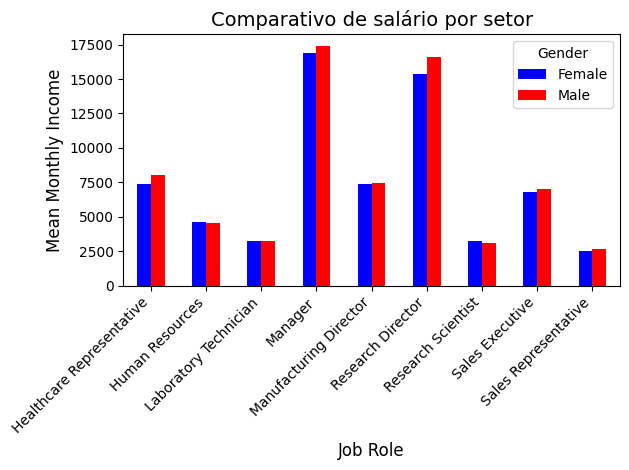

In [34]:
# Calcular a média salarial para homens e mulheres de cada jobrole
salary_by_jobrole_gender = df.groupby(['JobRole', 'Gender'])['MonthlyIncome'].mean().unstack()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
salary_by_jobrole_gender.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Mean Monthly Income', fontsize=12)
plt.title('Comparativo de salário por setor', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Comparativo da média salarial por entre homens e mulheres de acordo com a idade

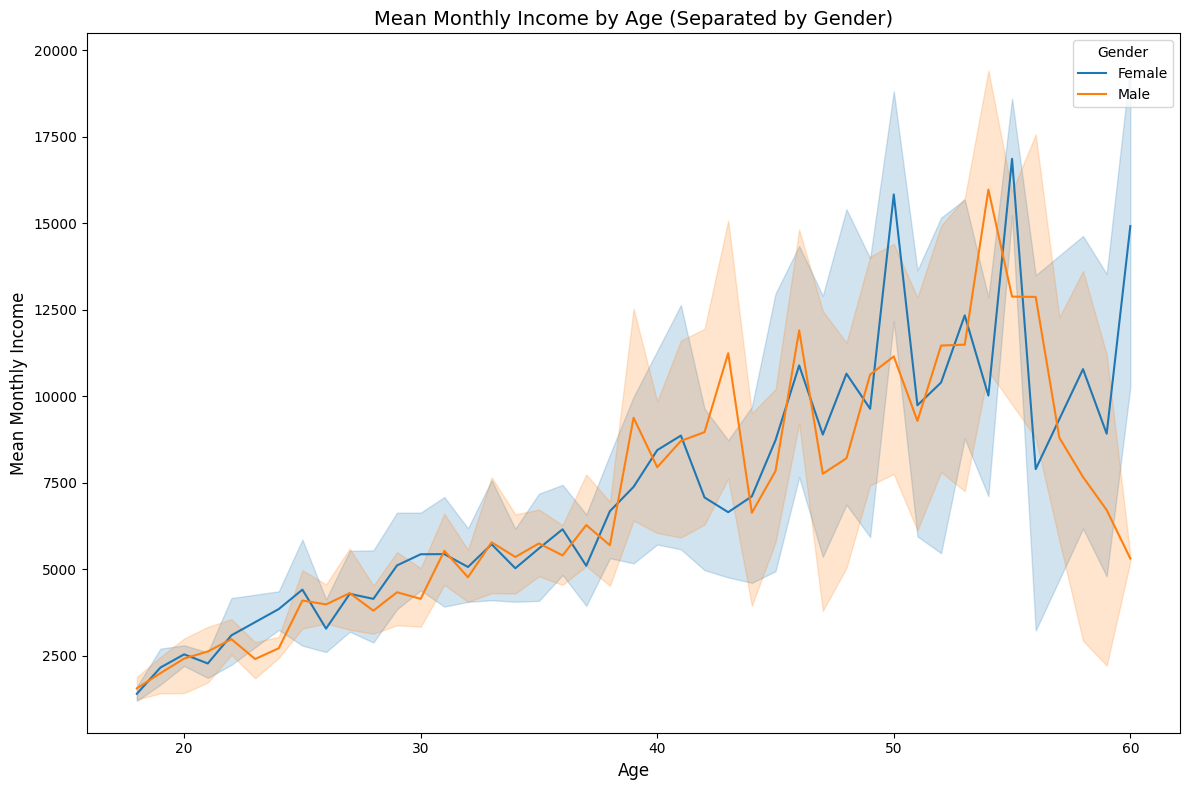

In [40]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Age', y='MonthlyIncome', hue='Gender', estimator='mean')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Mean Monthly Income', fontsize=12)
plt.title('Mean Monthly Income by Age (Separated by Gender)', fontsize=14)
plt.tight_layout()
plt.show()

Comparativo da média de salários entre homens e mulheres de acordo com o tempo de empresa

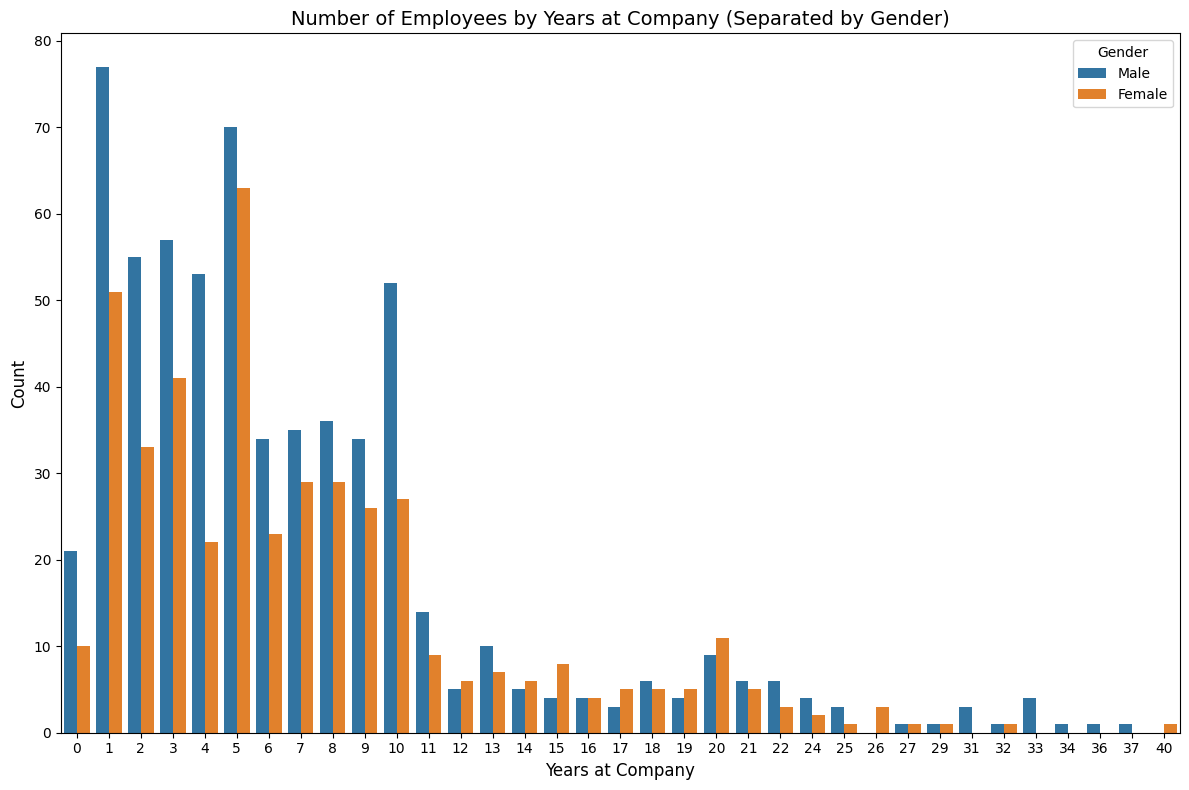

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='YearsAtCompany', hue='Gender')
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Employees by Years at Company (Separated by Gender)', fontsize=14)
plt.tight_layout()
plt.show()

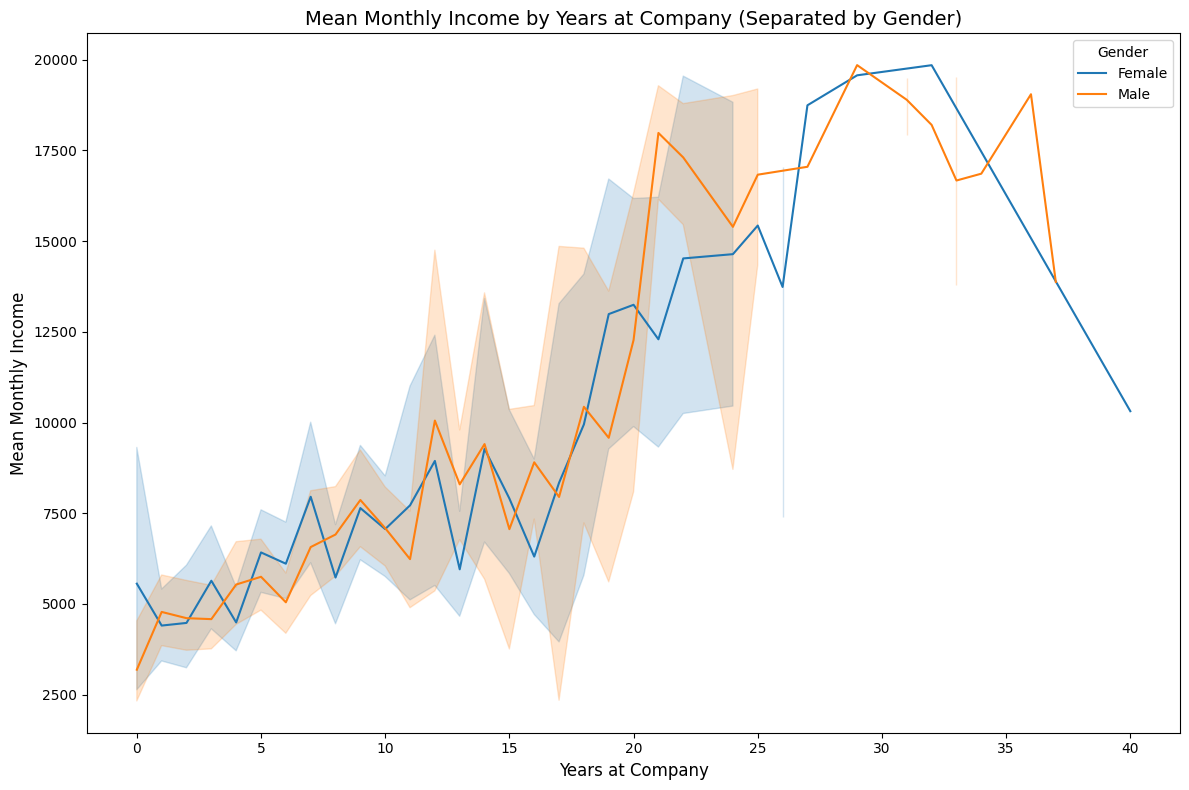

In [41]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='YearsAtCompany', y='MonthlyIncome', hue='Gender', estimator='mean')
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Mean Monthly Income', fontsize=12)
plt.title('Mean Monthly Income by Years at Company (Separated by Gender)', fontsize=14)
plt.tight_layout()
plt.show()